# Laboratoire 2 : Arbre de désision, Bayes naïf et KNN
#### Département du génie logiciel et des technologies de l’information

| Étudiants             | LEMARCHANT HUGO - LEMH03039705 * TAN ELODIE - TANE25619607 * JACQUES-SYLVAIN LECOINTRE LECJ19128301 |
|-----------------------|---------------------------------------------------------|
| Cours                 | GTI770 - Systèmes intelligents et apprentissage machine |
| Session               | Automne 2018                                            |
| Groupe                | C                                                       |
| Numéro du laboratoire | 02                                                      |
| Professeur            | Prof. Hervé Lombaert                                    |
| Chargé de laboratoire | Pierre-Luc Delisle                                      |
| Date                  | 11/10/2018                                              |

DOCUMENTATION : 
Le prof a dit d'utiliser ça : http://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

In [96]:
# -*- coding:utf-8 -*-
import numpy as np
import cv2
import matplotlib.pyplot as plt
import sys
import os, random
import math
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
import scipy.ndimage as nd
import csv
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import LeaveOneOut

In [3]:
# Hugo
pathHugo = "E:\\DocsPerso\\DocsBoulot\\ETS-MTL\\GTI770-02-SystIntel&MachineLearning\\data\\data\\images\\"
# JS
pathJS= '/Users/jslecointre/Documents/DataScience/courses/MACHINE_LEARNING/TP/data/images/'
pathElodie = '/Users/raen/Documents/UTC/ETS/GTI770/GTI770-Data/images/'
exts = ".jpg"
nb_img = "2"
path = pathElodie

## Galaxy Zoo

In [95]:
df = pd.read_csv('galaxy_feature_vectors.csv', delimiter = ',', header=None)
X_galaxy = df
df = pd.read_csv('galaxy_label_data_set.csv', delimiter = ',', header=None)
Y_galaxy = df

Xg_train, Xg_test, Yg_train, Yg_test = train_test_split(X_galaxy, Y_galaxy, test_size=0.20, random_state=42, stratify=Y_galaxy)

ValueError: Found input variables with inconsistent numbers of samples: [16908, 16909]

## Spam

In [5]:
df = pd.read_csv('spam.csv', delimiter = ',', header=None)
X_mail = df.loc[:, 0:56]
Y_mail = df.loc[:, 57]

Xm_train, Xm_test, Ym_train, Ym_test = train_test_split(X_mail, Y_mail, test_size=0.20, random_state=42, stratify=Y_mail)

### Arbres de décision
#### Max-depth : none

In [67]:
accuracies = []
f1_scores = []

In [68]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(Xm_train, Ym_train)
Y_pred = clf.predict(Xm_test)

acc = accuracy_score(Ym_test, Y_pred)
f1 = f1_score(Ym_test, Y_pred, average='weighted') 

accuracies.append(acc)
f1_scores.append(f1)

#### Max-depth : 3, 5, 10

In [69]:
for depth in (3, 5, 10):
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(Xm_train, Ym_train)
    Y_pred = clf.predict(Xm_test)

    acc = accuracy_score(Ym_test, Y_pred)
    f1 = f1_score(Ym_test, Y_pred, average='weighted') 

    accuracies.append(acc)
    f1_scores.append(f1)

### Arbres de décision - Accuracy & F1 Score

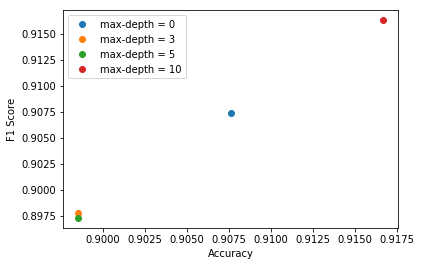

In [70]:
for i, label in zip(range(0, 4), (0, 3, 5, 10)):
    plt.plot(accuracies[i], f1_scores[i], "o", label='max-depth = {}'.format(label))
plt.xlabel("Accuracy")
plt.ylabel("F1 Score")
plt.legend()
plt.show()

### Arbres de décision - Cross validation

D'après le graphique des Accuracy et F1 scores, on se rend compte que le meilleur hyperparamètre pour les arbres de décision pour Spam est $max-depth = 10.$ On va donc effectuer la Cross-validation pour cet hyperparamètre.

In [72]:
K = 10
clf = tree.DecisionTreeClassifier(max_depth = 10)
scores = cross_val_score(clf, X_mail, Y_mail, cv= K)
print(sum(scores)/K)

0.9173823432884806


### KNN 
#### K = 3, 5, 10, Poids = 'uniform' & Poids = 'distance'

In [83]:
accuracies_uniform = []
f1_scores_uniform = []

accuracies_distance = []
f1_scores_distance = []

In [84]:
for n_neigh in (3, 5, 10):
    clf = KNeighborsClassifier(n_neighbors = n_neigh, weights='uniform')

    clf = clf.fit(Xm_train, Ym_train)
    Y_pred = clf.predict(Xm_test)

    acc = accuracy_score(Ym_test, Y_pred)
    f1 = f1_score(Ym_test, Y_pred, average='weighted') 

    accuracies_uniform.append(acc)
    f1_scores_uniform.append(f1)


    clf = KNeighborsClassifier(n_neighbors = n_neigh, weights='distance')
    clf = clf.fit(Xm_train, Ym_train)
    Y_pred = clf.predict(Xm_test)

    acc = accuracy_score(Ym_test, Y_pred)
    f1 = f1_score(Ym_test, Y_pred, average='weighted') 

    accuracies_distance.append(acc)
    f1_scores_distance.append(f1)

### KNN - Accuracy & F1 Scores

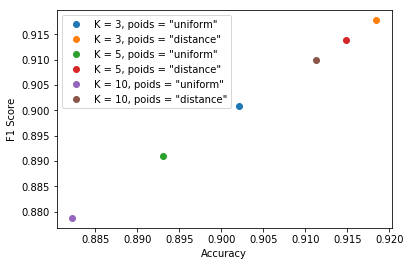

In [85]:
for i, label in zip(range(0, 3), (3, 5, 10)):
    plt.plot(accuracies_uniform[i], f1_scores_uniform[i], "o", label='K = {}, poids = "uniform"'.format(label))
    plt.plot(accuracies_distance[i], f1_scores_distance[i], "o", label='K = {}, poids = "distance"'.format(label))
plt.xlabel("Accuracy")
plt.ylabel("F1 Score")
plt.legend()
plt.show()

### KNN - Cross-validation

In [82]:
K = 10
clf = KNeighborsClassifier(n_neighbors=3, weights='distance')
scores = cross_val_score(clf, X_mail, Y_mail, cv= K)
print(sum(scores)/K)

0.8029222185756482


### Bayes Naive
#### Gaussian

In [19]:
clf = GaussianNB()
clf.fit(Xm_train, Ym_train)
Y_pred = clf.predict(Xm_test)

acc_gauss = accuracy_score(Ym_test, Y_pred)
f1_gauss = f1_score(Ym_test, Y_pred, average='weighted') 

print("Précision : {}".format(acc_gauss))
print("Score F1 : {}".format(f1_gauss))

Précision : 0.8387681159420289
Score F1 : 0.8402037805334562


#### Multinomial

In [20]:
est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
est.fit(X_mail) 

scaler = preprocessing.MinMaxScaler()
Xm_scaled = scaler.fit_transform(X_mail)

Xm_train, Xm_test, Ym_train, Ym_test = train_test_split(Xm_scaled, Y_mail, test_size=0.20, random_state=42, stratify=Y_mail)

clf = MultinomialNB()
clf.fit(Xm_train, Ym_train)
Y_pred = clf.predict(Xm_test)

acc_multi = accuracy_score(Ym_test, Y_pred)
f1_multi = f1_score(Ym_test, Y_pred, average='weighted') 

print("Précision : {}".format(acc_multi))
print("Score F1 : {}".format(f1_multi))


Précision : 0.9094202898550725
Score F1 : 0.9076189451243262


/Users/raen/anaconda3/envs/gti770_env/lib/python3.5/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


### Bayes - Cross validation

In [21]:
K = 10
clf = MultinomialNB()
scores = cross_val_score(clf, Xm_scaled, Y_mail, cv= K)
print(sum(scores)/K)

0.898148999015425


### Bayes - Leave one out

## Analyse de galaxies
### KNN 

In [24]:
galaxy_accuracies_uniform = []
galaxy_f1_scores_uniform = []

galaxy_accuracies_distance = []
galaxy_f1_scores_distance = []

#### K = 3, 5, 10, Poids = 'uniform' & Poids = 'distance'

In [26]:
for n_neigh in (3, 5, 10):

    clf = KNeighborsClassifier(n_neighbors=n_neigh, weights='uniform')

    clf = clf.fit(Xg_train, Yg_train)
    Y_pred = clf.predict(Xg_test)

    acc = accuracy_score(Yg_test, Y_pred)
    f1 = f1_score(Yg_test, Y_pred, average='weighted') 

    accuracies_uniform.append(acc)
    f1_scores_uniform.append(f1)


    clf = KNeighborsClassifier(n_neighbors=n_neigh, weights='distance')
    clf = clf.fit(Xg_train, Yg_train)
    Y_pred = clf.predict(Xg_test)

    acc = accuracy_score(Yg_test, Y_pred)
    f1 = f1_score(Yg_test, Y_pred, average='weighted') 

    accuracies_distance.append(acc)
    f1_scores_distance.append(f1)

NameError: name 'Xg_train' is not defined

#### KNN - Accuracy & F1 Scores

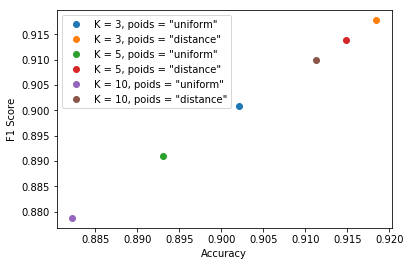

In [86]:
for i, label in zip(range(0, 3), (3, 5, 10)):
    plt.plot(accuracies_uniform[i], f1_scores_uniform[i], "o", label='K = {}, poids = "uniform"'.format(label))
    plt.plot(accuracies_distance[i], f1_scores_distance[i], "o", label='K = {}, poids = "distance"'.format(label))
plt.xlabel("Accuracy")
plt.ylabel("F1 Score")
plt.legend()
plt.show()

#### KNN - Cross-validation

In [87]:
K = 10
clf = KNeighborsClassifier(n_neighbors=3, weights='distance')
scores = cross_val_score(clf, X_galaxy, Y_galaxy, cv= K)
print(sum(scores)/K)

0.8029222185756482


### Bayes
#### Gaussian

In [92]:
clf = GaussianNB()
clf.fit(Xg_train, Yg_train)
Y_pred = clf.predict(Xg_test)

acc_gauss = accuracy_score(Yg_test, Y_pred)
f1_gauss = f1_score(Yg_test, Y_pred, average='weighted') 

print("Précision : {}".format(acc_gauss))
print("Score F1 : {}".format(f1_gauss))

NameError: name 'Xg_train' is not defined

#### Multinomial

In [90]:
est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
est.fit(X_galaxy) 

scaler = preprocessing.MinMaxScaler()
Xg_scaled = scaler.fit_transform(X_galaxy)

Xg_train, Xg_test, Yg_train, Yg_test = train_test_split(Xg_scaled, Y_galaxy, test_size=0.20, random_state=42, stratify=Y_galaxy)

clf = MultinomialNB()
clf.fit(Xg_train, Yg_train)
Y_pred = clf.predict(Xg_test)

acc_multi = accuracy_score(Yg_test, Y_pred)
f1_multi = f1_score(Yg_test, Y_pred, average='weighted') 

print("Précision : {}".format(acc_multi))
print("Score F1 : {}".format(f1_multi))

Précision : 0.9094202898550725
Score F1 : 0.9076189451243262


/Users/raen/anaconda3/envs/gti770_env/lib/python3.5/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


#### Bayes - Cross validation

In [91]:
K = 10
clf = MultinomialNB()
scores = cross_val_score(clf, Xm_scaled, Y_galaxy, cv= K)
print(sum(scores)/K)

0.898148999015425


## Question 1
### Méthode de création des ensembles de données
Nous avons essentiellement utilisé les méthodes de la librairie Scikitlearn pour créer nos ensembles de données. Nous utilisons train_test_split pour entrainer des algorithmes avec des validations en holdout, et cross_val_score pour des entrainements avec K fold cross validation.

## Question 1
### Détails des ensembles produits


## Question 2
### Approche de validation proposée et justification
Nous avons choisi de pratiquer des K fold cross validations pour valider la totalité de nos apprentissages car nous pensons que c'est le meilleur compromis parmi K flod CV, leave one out, leave P out et holdout. En effet il nous permet de tester suffisamment de cas de figures d'entrainements pour être confiant sur l'apprentissage suffisamment général par rapport à holdout mais sans pour autant être aussi gourmand en ressources que leave one out ou leave P out.

## Question 3
### Matrice des expérimentations

|Données|Pourriels|Galaxies|
|-------|---------|--------|
|Arbre de décision d=3|Acc = 0.8983, F1 = 0.8975||
|Arbre de décision d=5|Acc = 0.9000, F1 = 0.8990||
|Arbre de décision d=10|Acc = 0.9155, F1 = 0.9145||
|Arbre de décision d=inf|Acc = 0.9133, F1 = 0.9130||
|Arbre de décision 10-CV|0.9098||
|3-NN Uniform|Acc = 0.82, F1 = 0.82||
|3-NN Distance|Acc = 0.83, F1 = 0.83||
|5-NN Uniform|Acc = 0.809, F1 = 0.809||
|5-NN Distance|Acc = 0.825, F1 = 0.825||
|10-NN Uniform|Acc = 0.783, F1 = 0.782||
|10-NN Distance|Acc = 0.828, F1 = 0.828||
|3-NN Distance 10-CV|0.8029||
|Bayes Gaussian|Acc = 0.826, F1 = 0.828||
|Bayes Multinomial|Acc = 0.9094, F1 = 0.9076||
|Bayes Multinomial 10-CV|.08981||



### Etude des hyperparamètres

#### Arbres de décision  
D'après nos données, plus la profondeur de l'arbre est élevée, plus la précision et le score F1 sont élevés. Lors de l'apprentissage, plus l'arbre est grand, plus l'entropie donc la pureté de nos ensembles de données est meilleure. Dans le cas d'apprentissage pour les spams, la profondeur de 10 ne semble pas causer de surapprentissage.   

#### KNN  
$poids = uniform$ veut dire que chaque voisin aura le même poids alors que $poids = distance$ donne un poids différent à chaque voisin pour la décision de l'algorithme KNN, qui est proportionnelle à l'inverse de la distance au point dont nous voulons connaitre la classe.  
Dans le cas des spams, les meilleurs hyperparamètres sont : $nombre de voisins = 3$ et $poids = distance$. Nous pouvons expliquer cela par le fait que....
De plus, nous pouvons remarquer que lorsque l'hyperparamètre du poids est égal à $distance$, les résultats sont significativement meilleurs. En effet, les voisins les plus proches aideront à mieux discriminer le point étudié. 

#### Bayes  
Le meilleur résultat pour l'algorithme de Bayes naïf est lorsque celui-ci est multinomial, avec les hyperparamètres $MinMaxScaler$ et la **Discrétisation non-supervisée**.  D'après la définition de Scikit-learn, $MinMaxScaler$ transforme les primitives en les mettant à l'échelle entre 0 et 1. **Dire à quoi ça sert**
$KBinsDiscretizer$ permet de discrétiser les attributs continus que nous avons en entrée. 

## Question 4
### Impact de la taille des ensembles de données sur la performance de classification

## Question 5
### Impact du bruit dans les ensembles de données sur la performance de classification

## Question 6
### Discussion sur la nature des données

## Question 7
### Recommandations

## Question 8
### Améliorations possibles